In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("laptopDataNB.csv")

In [3]:
df

,ID,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,133.0,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,713786832
1,1,Apple,Ultrabook,133.0,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,478955232
2,2,HP,Notebook,156.0,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636
3,3,Apple,Ultrabook,154.0,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195336
4,4,Apple,Ultrabook,133.0,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095808
...,...,...,...,...,...,...,...,...,...,...,...,...
1268,1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,3399264
1269,1299,Lenovo,2 in 1 Convertible,133.0,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,7986672
1270,1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,1220112
1271,1301,HP,Notebook,156.0,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,4070592


In [4]:
df=df.drop("ID",axis=1)
df=df.join(pd.get_dummies(df.Company))
df=df.drop("Company",axis=1)

In [5]:
df=df.join(pd.get_dummies(df.TypeName))
df=df.drop("TypeName",axis=1)

In [6]:
df["ScreenResolution"] = df.ScreenResolution.str.split(" ").str[-1]
df["Screen Width"] = df.ScreenResolution.str.split("x").str[0].astype("int")
df["Screen Height"] = df.ScreenResolution.str.split("x").str[1].astype("int")

In [7]:
df = df.drop("ScreenResolution", axis=1)

In [8]:
df["CPU Brand"] = df.Cpu.str.split(" ").str[0]
df["CPU Frequency"] = df.Cpu.str.split(" ").str[-1].str[:-3].astype("float")
df["Ram"] = df["Ram"].str[:-2].astype("int")
df = df.drop("Cpu", axis=1)

In [9]:
df["MemoryAmount"] = df.Memory.str.split(" ").str[0]
df["MemoryType"] = df.Memory.str.split(" ").str[1]

In [10]:
def turn_memory_into_MB(value):
    if "GB" in value:
        return (float(value[:value.find("GB")]) * 1000 *1000 *1000) /(1024*1024)
    elif "TB" in value:
        return (float(value[:value.find("TB")]) * 1000 * 1000 * 1000 *1000 )/(1024*1024*1024)


df["MemoryAmount"] = df["MemoryAmount"].apply(turn_memory_into_MB)
df = df.drop("Memory", axis=1)

In [11]:
df["GPU Brand"] = df.Gpu.str.split(" ").str[0]

In [12]:
df = df.join(pd.get_dummies(df.OpSys))
df = df.drop("OpSys", axis=1)

In [13]:
cpu_categories = pd.get_dummies(df["CPU Brand"])
cpu_categories.columns = [col + "_CPU" for col in cpu_categories.columns]

df = df.join(cpu_categories)
df = df.drop("CPU Brand", axis=1)

In [14]:
gpu_categories = pd.get_dummies(df["GPU Brand"])
gpu_categories.columns = [col + "_GPU" for col in gpu_categories.columns]

df = df.join(gpu_categories)
df = df.drop("GPU Brand", axis=1)

In [15]:
df["Weight"] = df["Weight"].str[:-2].astype("float")

In [16]:
df = df.drop("Gpu", axis=1)
df=df.join(pd.get_dummies(df.MemoryType))
df=df.drop("MemoryType",axis=1)
df

,Inches,Ram,Weight,Price,Acer,Apple,Asus,Chuwi,Dell,Fujitsu,...,Intel_CPU,Samsung_CPU,AMD_GPU,ARM_GPU,Intel_GPU,Nvidia_GPU,Flash,HDD,Hybrid,SSD
0,133.0,8,1.37,713786832,False,True,False,False,False,False,...,True,False,False,False,True,False,False,False,False,True
1,133.0,8,1.34,478955232,False,True,False,False,False,False,...,True,False,False,False,True,False,True,False,False,False
2,156.0,8,1.86,30636,False,False,False,False,False,False,...,True,False,False,False,True,False,False,False,False,True
3,154.0,16,1.83,135195336,False,True,False,False,False,False,...,True,False,True,False,False,False,False,False,False,True
4,133.0,8,1.37,96095808,False,True,False,False,False,False,...,True,False,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1268,14.0,4,1.80,3399264,False,False,False,False,False,False,...,True,False,False,False,True,False,False,False,False,True
1269,133.0,16,1.30,7986672,False,False,False,False,False,False,...,True,False,False,False,True,False,False,False,False,True
1270,14.0,2,1.50,1220112,False,False,False,False,False,False,...,True,False,False,False,True,False,True,False,False,False
1271,156.0,6,2.19,4070592,False,False,False,False,False,False,...,True,False,True,False,False,False,False,True,False,False


<Axes: >

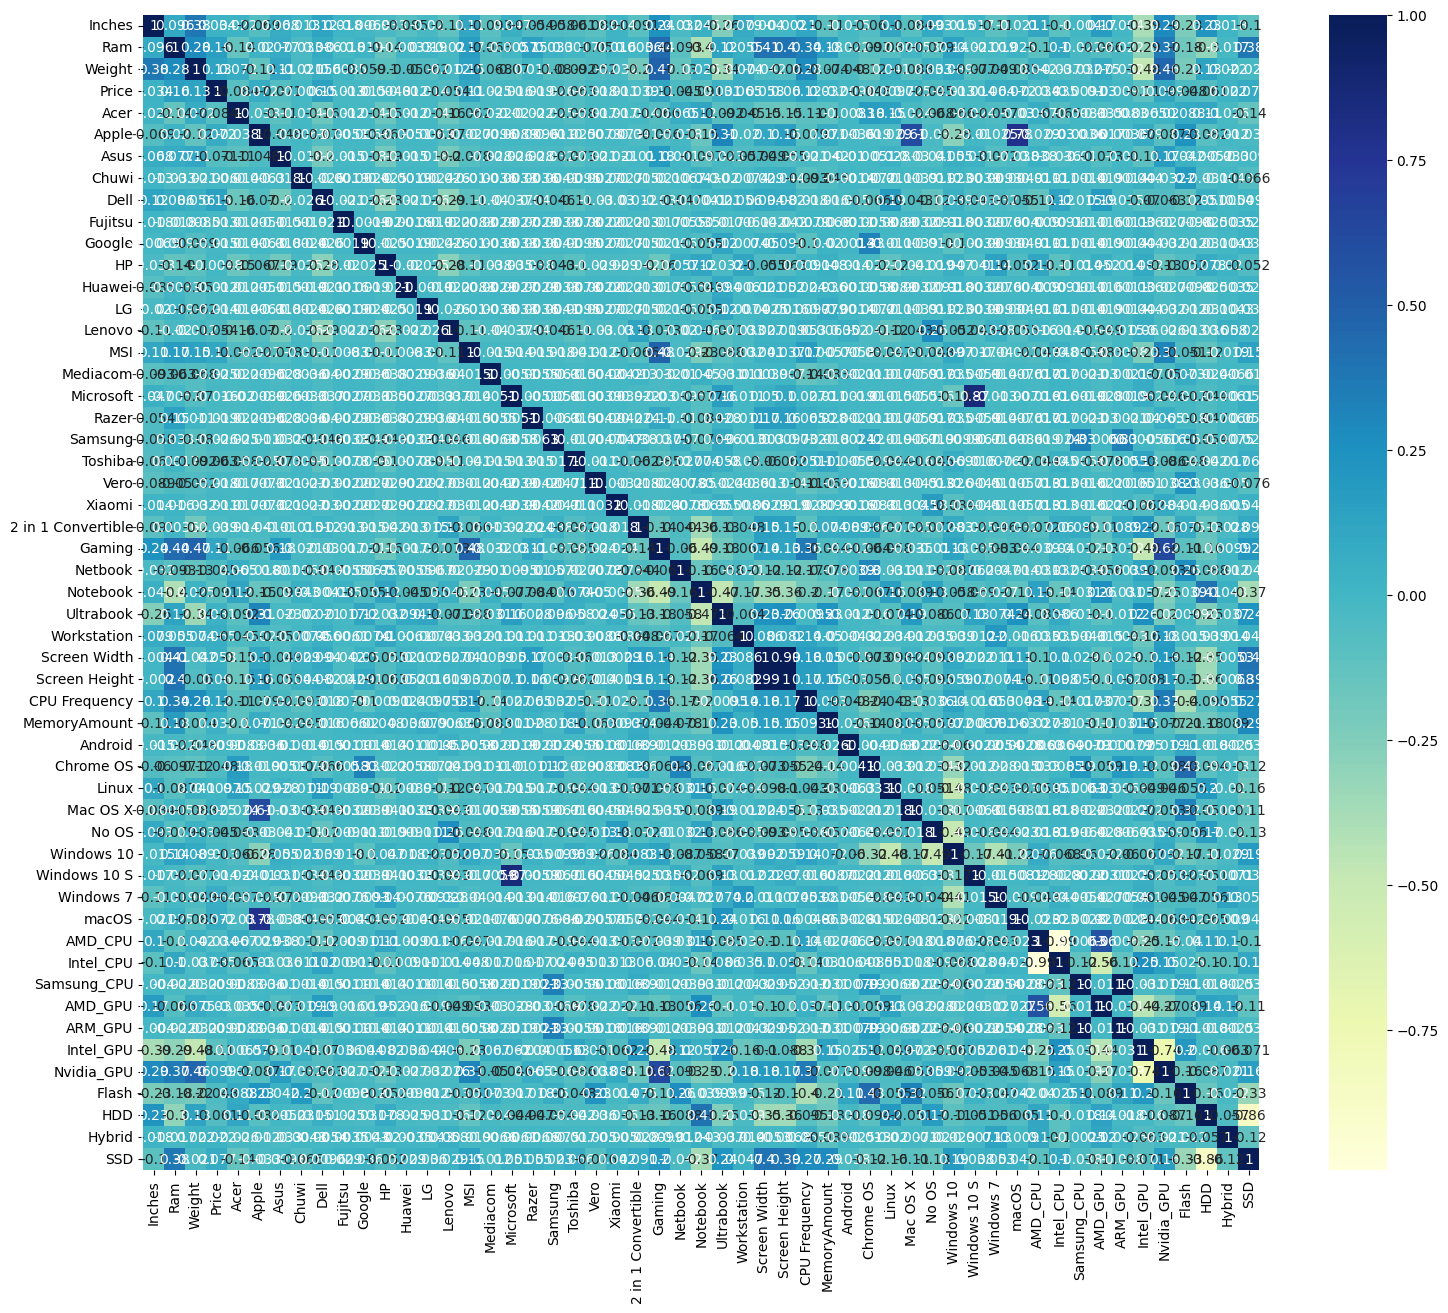

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 15))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")

In [18]:
target_correlations = df.corr()['Price'].apply(abs).sort_values()

In [19]:
target_correlations

HP                    0.004804
Chuwi                 0.005981
ARM_GPU               0.009064
Samsung_CPU           0.009064
Android               0.009136
Linux                 0.009659
Xiaomi                0.010648
Huawei                0.012107
Fujitsu               0.012762
Windows 10            0.012907
LG                    0.014060
Windows 10 S          0.014489
Google                0.015025
Microsoft             0.016475
Vero                  0.017578
Razer                 0.019323
Hybrid                0.021886
Mac OS X              0.024557
Mediacom              0.024792
Samsung               0.025775
AMD_GPU               0.029691
Ultrabook             0.031062
MemoryAmount          0.032021
Inches                0.033888
AMD_CPU               0.034051
Intel_CPU             0.034964
2 in 1 Convertible    0.038635
Netbook               0.045041
No OS                 0.045196
Chrome OS             0.047725
Flash                 0.048154
Lenovo                0.053647
Screen W

In [20]:
selected_features = target_correlations[-21:].index
selected_features = list(selected_features)
selected_features

['Screen Width',
 'Screen Height',
 'HDD',
 'Toshiba',
 'Windows 7',
 'Workstation',
 'Asus',
 'macOS',
 'Apple',
 'SSD',
 'Acer',
 'Notebook',
 'Nvidia_GPU',
 'MSI',
 'Intel_GPU',
 'Gaming',
 'CPU Frequency',
 'Weight',
 'Dell',
 'Ram',
 'Price']

In [21]:
limited_df = df[selected_features]
limited_df

,Screen Width,Screen Height,HDD,Toshiba,Windows 7,Workstation,Asus,macOS,Apple,SSD,...,Notebook,Nvidia_GPU,MSI,Intel_GPU,Gaming,CPU Frequency,Weight,Dell,Ram,Price
0,2560,1600,False,False,False,False,False,True,True,True,...,False,False,False,True,False,2.3,1.37,False,8,713786832
1,1440,900,False,False,False,False,False,True,True,False,...,False,False,False,True,False,1.8,1.34,False,8,478955232
2,1920,1080,False,False,False,False,False,False,False,True,...,True,False,False,True,False,2.5,1.86,False,8,30636
3,2880,1800,False,False,False,False,False,True,True,True,...,False,False,False,False,False,2.7,1.83,False,16,135195336
4,2560,1600,False,False,False,False,False,True,True,True,...,False,False,False,True,False,3.1,1.37,False,8,96095808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1268,1920,1080,False,False,False,False,False,False,False,True,...,False,False,False,True,False,2.5,1.80,False,4,3399264
1269,3200,1800,False,False,False,False,False,False,False,True,...,False,False,False,True,False,2.5,1.30,False,16,7986672
1270,1366,768,False,False,False,False,False,False,False,False,...,True,False,False,True,False,1.6,1.50,False,2,1220112
1271,1366,768,True,False,False,False,False,False,False,False,...,True,False,False,False,False,2.5,2.19,False,6,4070592


<Axes: >

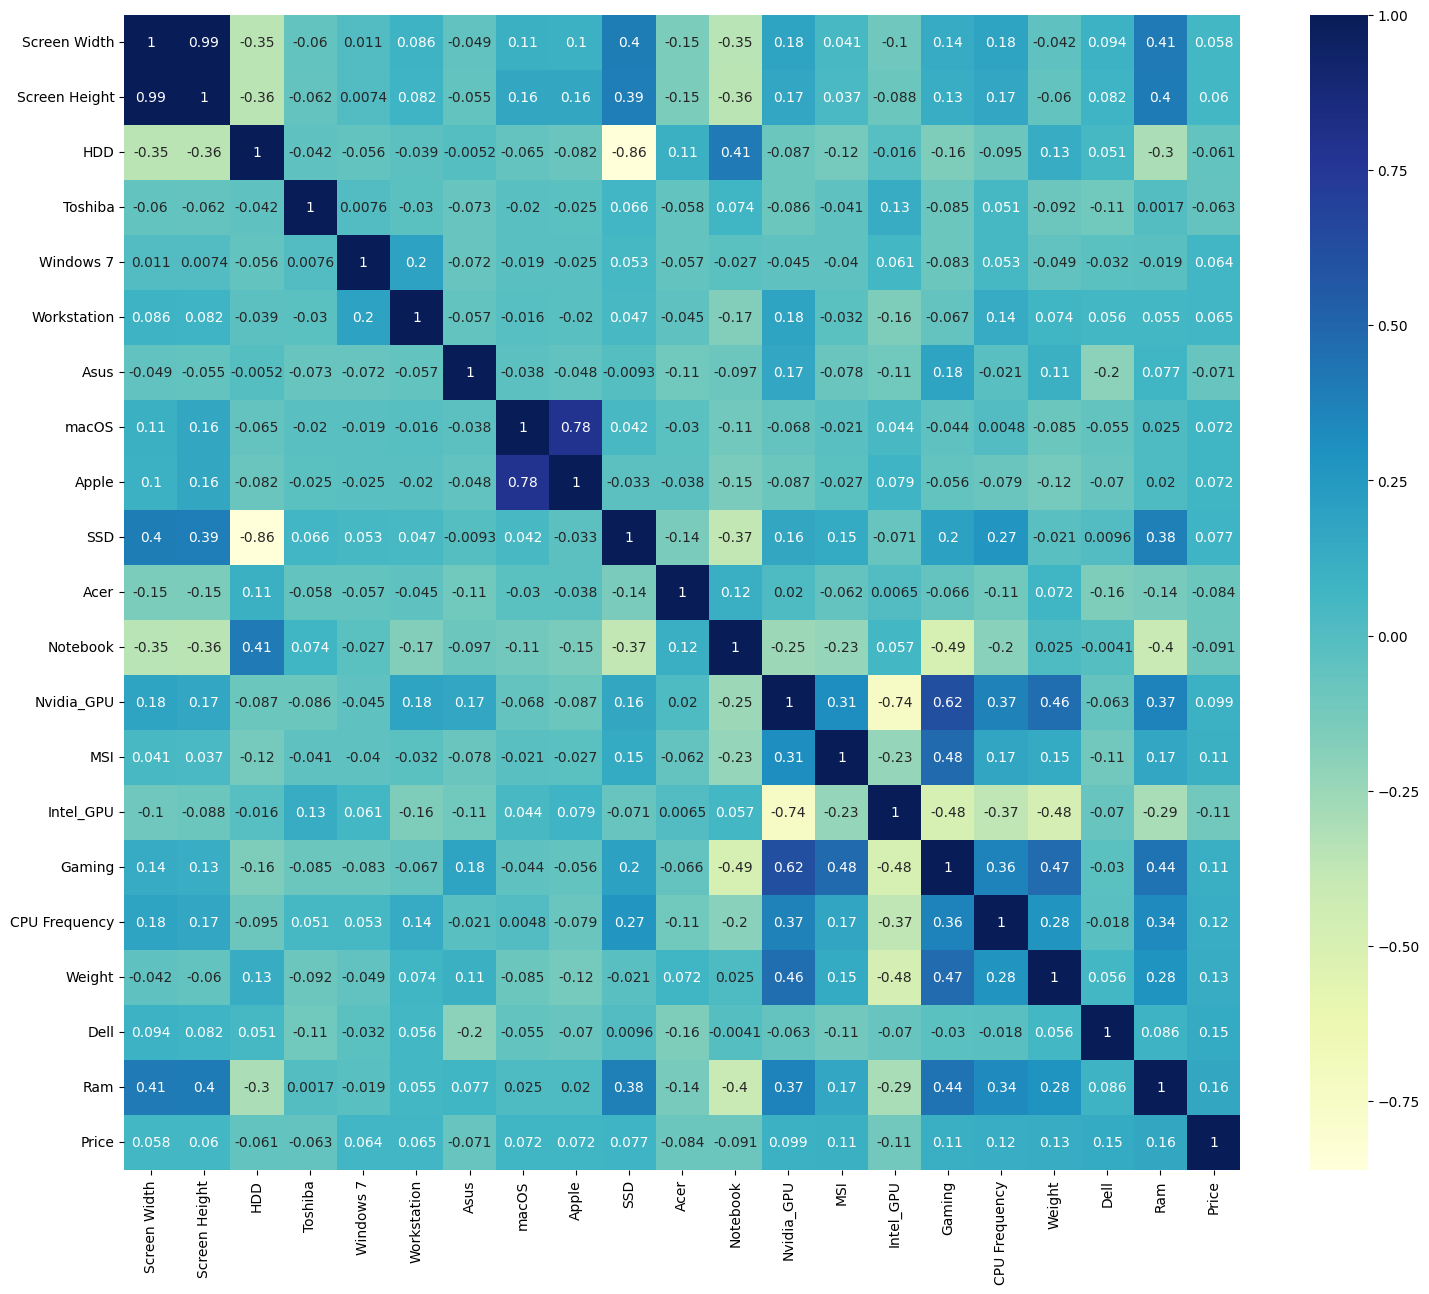

In [22]:
plt.figure(figsize=(18, 15))
sns.heatmap(limited_df.corr(), annot=True, cmap="YlGnBu")

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X, y = limited_df.drop("Price", axis=1), limited_df["Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.45)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
forest = RandomForestRegressor()

forest.fit(X_train_scaled, y_train)

RandomForestRegressor()

In [25]:
forest.score(X_test_scaled, y_test)

-0.08433377093485861

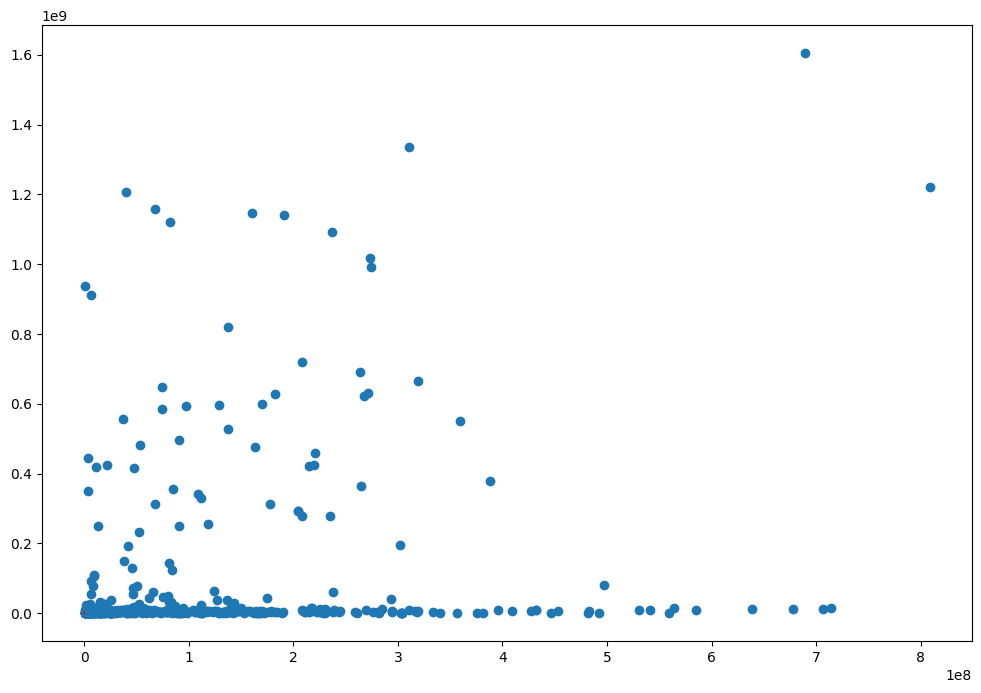

In [26]:
y_pred = forest.predict(X_test_scaled)
plt.figure(figsize=(12, 8))
plt.scatter(y_pred, y_test)
plt.plot(range(0, 6000), range(0, 6000), c="red")

In [27]:
X_new_scaled = scaler.transform([X_test.iloc[0]])

C:\Users\vteav\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [28]:
forest.predict(X_new_scaled)

array([1.26913266e+08])

In [29]:
y_test.iloc[0]

5338656